In [1]:
from collections import defaultdict
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
novice_df = pd.read_excel("/content/drive/MyDrive/Novice.xlsx")
novice_df.head()

,Match ID 18Char,Stage,Little ID,Big ID,Big County,Big Age,Big Occupation,Big: Military,Big Approved Date,Big Level of Education,...,Little Contact: Interest Finder - Career,Little Contact: Interest Finder - Personality,Little Contact: Interest Finder - Three Wishes,Little Gender,Little Participant: Race/Ethnicity,Little Birthdate,Little Mailing Address Census Block Group,Big Home Census Block Group,Big Employer/School Census Block Group,Match Length
0,a1v2J0000028pRvQAI,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,NaT,Masters Degree,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
1,a1v2J000002uR0JQAU,Closed,0032J00003PfZ6OQAV,0032J00003PgoV1,Washington,65,Tech: Research/Design,NaN,2018-04-11,NaN,...,NaN,NaN,NaN,Female,Black or African American; White or Caucasian,2006-06-01,2.716307e+11,2.716307e+11,NaN,46.1
2,a1v2J0000027NsOQAU,Closed,0032J00003PLeoRQAT,0032J00003Ph0MT,Ramsey,45,Military,NaN,NaT,Bachelors Degree,...,NaN,NaN,NaN,Male,Black or African American; White or Caucasian,2007-01-01,2.700305e+11,2.712304e+11,NaN,6.2
3,a1v2J0000027dtOQAQ,Active,0032J00003PLeoRQAT,0032J00003Ph14N,Hennepin,61,Finance: Banking,NaN,2018-01-02,NaN,...,NaN,NaN,NaN,Male,Black or African American; White or Caucasian,2007-01-01,2.700305e+11,NaN,NaN,85.6
4,a1v2J0000028enKQAQ,Closed,0032J00003PfZ6QQAV,0032J00003Ph14j,Ramsey,29,Human Services: Non-Profit,NaN,2018-03-12,Bachelors Degree,...,NaN,NaN,NaN,Female,Hispanic,2005-01-01,2.716307e+11,2.705311e+11,NaN,28.3


In [3]:
training = pd.read_excel("/content/drive/MyDrive/Training.xlsx")
training.head()

,Match ID 18Char,Completion Date,Match Support Contact Notes,Stage,Little ID,Big ID,Big County,Big Age,Big Occupation,Big: Military,...,Little Contact: Interest Finder - Career,Little Contact: Interest Finder - Personality,Little Contact: Interest Finder - Three Wishes,Little Gender,Little Participant: Race/Ethnicity,Little Birthdate,Little Mailing Address Census Block Group,Big Home Census Block Group,Big Employer/School Census Block Group,Match Length
0,a1v2J0000028pRvQAI,2017-11-30,Question: Activities: Answer: See ms...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
1,a1v2J0000028pRvQAI,2017-10-31,Question: Activities: Answer: See MS...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
2,a1v2J0000028pRvQAI,2017-12-01,Question: Activities: Answer: Match ...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
3,a1v2J0000028pRvQAI,2017-05-29,Question: Activities: Answer: Msc as...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
4,a1v2J0000028pRvQAI,2017-04-30,Question: Activities: Answer: Msc as...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0


## Data Cleaning

In [4]:
novice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 66 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Match ID 18Char                                    3275 non-null   object        
 1   Stage                                              3275 non-null   object        
 2   Little ID                                          3275 non-null   object        
 3   Big ID                                             3275 non-null   object        
 4   Big County                                         2620 non-null   object        
 5   Big Age                                            3275 non-null   int64         
 6   Big Occupation                                     2950 non-null   object        
 7   Big: Military                                      1231 non-null   object        
 8   Big Approved Date 

In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39345 entries, 0 to 39344
Data columns (total 68 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Match ID 18Char                                    39345 non-null  object        
 1   Completion Date                                    39198 non-null  datetime64[ns]
 2   Match Support Contact Notes                        37891 non-null  object        
 3   Stage                                              39345 non-null  object        
 4   Little ID                                          39345 non-null  object        
 5   Big ID                                             39345 non-null  object        
 6   Big County                                         32357 non-null  object        
 7   Big Age                                            39345 non-null  int64         
 8   Big Occupation  

In [6]:
# Separate into 3 groups of variable: big info, little info, match info
match_info_cols = []
big_info_cols = []
little_info_cols = []
for col in novice_df.columns:
  if 'Big' in col:
    big_info_cols.append(col)
  elif 'Little' in col:
    little_info_cols.append(col)
  else:
    match_info_cols.append(col)

In [7]:
count_na_df = novice_df.isna().sum().reset_index()
count_na_df[0] = count_na_df[0] / novice_df.shape[0]
count_na_df[count_na_df[0] == 0]

,index,0
0,Match ID 18Char,0.0
1,Stage,0.0
2,Little ID,0.0
3,Big ID,0.0
5,Big Age,0.0
12,Big Birthdate,0.0
14,Program,0.0
15,Program Type,0.0
19,Match Activation Date,0.0
61,Little Birthdate,0.0


In [8]:
count_na_df = novice_df.isna().sum().reset_index()
count_na_df[0] = count_na_df[0] / novice_df.shape[0]
count_na_df[count_na_df[0] > 0]

,index,0
4,Big County,0.200000
6,Big Occupation,0.099237
7,Big: Military,0.624122
8,Big Approved Date,0.088855
9,Big Level of Education,0.862595
10,Big Languages,0.461679
11,Big Gender,0.000305
13,Big Employer,0.168244
16,Big Race/Ethnicity,0.010076
17,Closure Reason,0.240000


In [9]:
count_na_df_1 = training.isna().sum().reset_index()
count_na_df_1[0] = count_na_df_1[0] / training.shape[0]
count_na_df_1[count_na_df_1[0] == 0]

,index,0
0,Match ID 18Char,0.0
3,Stage,0.0
4,Little ID,0.0
5,Big ID,0.0
7,Big Age,0.0
14,Big Birthdate,0.0
16,Program,0.0
17,Program Type,0.0
21,Match Activation Date,0.0
63,Little Birthdate,0.0


In [10]:
count_na_df_1 = training.isna().sum().reset_index()
count_na_df_1[0] = count_na_df_1[0] / training.shape[0]
count_na_df_1[count_na_df_1[0] > 0]

,index,0
1,Completion Date,0.003736
2,Match Support Contact Notes,0.036955
6,Big County,0.177608
8,Big Occupation,0.085119
9,Big: Military,0.678206
10,Big Approved Date,0.103393
11,Big Level of Education,0.854111
12,Big Languages,0.410344
13,Big Gender,0.000305
15,Big Employer,0.145228


In [11]:
col_edited = [] # store the list of columns we modified

In [12]:
# Analyze columns about big with nas
for col in big_info_cols:
  if col in count_na_df[count_na_df[0] > 0]["index"].values:
    print(col)
    print(f"% missing in novice data {count_na_df[count_na_df['index'] == col][0].values}")
    print(f"% missing in training data {count_na_df_1[count_na_df_1['index'] == col][0].values}")
    if novice_df[col].dtypes == "O":
      print(novice_df[col].unique())
      print(training[col].unique())
    else:
      print(novice_df[col].min(skipna = True), novice_df[col].max(skipna = True))
      print(training[col].min(skipna = True), novice_df[col].max(skipna = True))
    print("")
# Analysis of possible filling
# Big Occupation: can be Unemployed (only 9% of records missing this)
# Big Military: can be none since 60% of records missing this info
# Big Language: can be No Preference since we also have some value of this class (or this could also be common language like English) => people can have multiple language, how to separate them
# Big Gender: can be Prefer Not to say, and we only have 0.03% of missing values
# Big Employer: Check if these nas value related to nas of Big Occupation
# Big Race/Ethnicity: Prefer not to say maybe since there is only 1% of data missing
# Big Assessment Uploaded, Big Acceptance Date, and Big Days Interview to Acceptance seems to have similar number of missing records => any relation between them?
# Big Car Access: might need to based on the demographic info to decide on if this big have a car access? (something like KNN Imputation)
# Big Open to Cross-Gender Match: Might be yes since nan often mean no preference
# Big Re-Enroll: Filled based on if there is previous records
# Big Contact: Preferred Communication Type: nans can be no preference
# Big Contact: Former Big/Little: should be none
# Big Contact: Interest Finder: should be none
# Big Contact: Volunteer Availability: can be no preference

Big County
% missing in novice data [0.2]
% missing in training data [0.17760834]
['Hennepin' 'Washington' 'Ramsey' 'Anoka' nan 'Stearns' 'Wright' 'Dakota'
 'Scott' 'Isanti' 'Chisago' 'St. Croix County' 'Carver' 'McLeod' 'King'
 'St. Croix' 'Testing County' 'MN' 'Outside state' 'LeSeuer' 'Story'
 'St. Croix County, WI' 'Fulton' 'mn' 'US' 'United States'
 'United States of America' 'California' 'Dane' 'Hennepin County'
 'Henepin' 'Other' 'Ramesy' 'Hennpin' 'Sarpy' 'Rice' 'Sherburne' 'Polk'
 'Pierce' 'Middlesex' 'Okanogan' 'New Castle County' 'Ozaukee' 'Lake'
 'Outagamie' 'Brown' 'Lincoln' 'Hudson' 'Fond du Lac' 'Freeborn' 'Sawyer'
 'Waukesha' 'Olmsted' 'Marathon' 'Rice County']
['Hennepin' 'Washington' 'Ramsey' 'Anoka' nan 'Stearns' 'Wright' 'Dakota'
 'Scott' 'Isanti' 'Chisago' 'St. Croix County' 'Carver' 'McLeod' 'King'
 'St. Croix' 'Testing County' 'MN' 'Outside state' 'LeSeuer' 'Story'
 'St. Croix County, WI' 'Fulton' 'mn' 'US' 'United States'
 'United States of America' 'California'

In [13]:
training.groupby("Big ID")["Big County"].nunique(dropna = False).sort_values()
# either have county data or only have nas => no interpolate

,Big County
Big ID,
003UX00000DJxUo,1
003UX00000DD05x,1
003UX00000D1aYD,1
003UX00000D1LcQ,1
003UX00000Cylun,1
...,...
003UX00000DgmUE,1
003UX00000DgmUM,1
003UX00000DgmUa,1


In [14]:
minnesota_counties = [
    "Aitkin", "Anoka", "Becker", "Beltrami", "Benton", "Big Stone", "Blue Earth", "Brown",
    "Carlton", "Carver", "Cass", "Chippewa", "Chisago", "Clay", "Clearwater", "Cook",
    "Cottonwood", "Crow Wing", "Dakota", "Dodge", "Douglas", "Faribault", "Fillmore",
    "Freeborn", "Goodhue", "Grant", "Hennepin", "Houston", "Hubbard", "Isanti", "Itasca",
    "Jackson", "Kanabec", "Kandiyohi", "Kittson", "Koochiching", "Lac qui Parle", "Lake",
    "Lake of the Woods", "Le Sueur", "Lincoln", "Lyon", "Mahnomen", "Marshall", "Martin",
    "McLeod", "Meeker", "Mille Lacs", "Morrison", "Mower", "Murray", "Nicollet", "Nobles",
    "Norman", "Olmsted", "Otter Tail", "Pennington", "Pine", "Pipestone", "Polk",
    "Pope", "Ramsey", "Red Lake", "Redwood", "Renville", "Rice", "Rock", "Roseau",
    "Scott", "Sherburne", "Sibley", "St. Louis", "Stearns", "Steele", "Stevens",
    "Swift", "Todd", "Traverse", "Wabasha", "Wadena", "Waseca", "Washington",
    "Watonwan", "Wilkin", "Winona", "Wright", "Yellow Medicine"
]
wisconsin_counties = [
    "Adams", "Ashland", "Barron", "Bayfield", "Brown", "Buffalo", "Burnett", "Calumet",
    "Chippewa", "Clark", "Columbia", "Crawford", "Dane", "Dodge", "Door", "Douglas",
    "Dunn", "Eau Claire", "Florence", "Fond du Lac", "Forest", "Grant", "Green",
    "Green Lake", "Iowa", "Iron", "Jackson", "Jefferson", "Juneau", "Kenosha",
    "Kewaunee", "La Crosse", "Lafayette", "Langlade", "Lincoln", "Manitowoc",
    "Marathon", "Marinette", "Marquette", "Menominee", "Milwaukee", "Monroe",
    "Oconto", "Oneida", "Outagamie", "Ozaukee", "Pepin", "Pierce", "Polk",
    "Portage", "Price", "Racine", "Richland", "Rock", "Rusk", "Sauk", "Sawyer",
    "Shawano", "Sheboygan", "St. Croix", "Taylor", "Trempealeau", "Vernon",
    "Vilas", "Walworth", "Washburn", "Washington", "Waukesha", "Waupaca",
    "Waushara", "Winnebago", "Wood"
]
county_map = {
    "MN": defaultdict(set),
    "WI": defaultdict(set),
    "Other": defaultdict(set)
}
for county in novice_df["Big County"].unique():
  filled = False
  for mcounty in minnesota_counties:
    if mcounty.lower().replace(" ", "") in str(county).lower().replace(" ", ""):
      county_map["MN"][mcounty].add(county)
      filled = True
      break
  for mcounty in wisconsin_counties:
    if mcounty.lower().replace(" ", "") in str(county).lower().replace(" ", ""):
      county_map["WI"][mcounty].add(county)
      filled = True
      break
  if not filled:
    if "mn" in str(county).lower().replace(" ", ""):
      county_map["MN"]["Other"].add(county)
    elif str(county).lower().replace(" ", "") in list(map(lambda x: x.lower().replace(" ", ""), ["Henepin", "Hennpin", 'Other', 'Outside state', 'Testing County','US','United States','United States of America'])) or pd.isna(county):
      county_map["Other"]["Other"].add(county)
    else:
      county_map["Other"][county].add(county)
# extra fix
county_map["MN"]["Hennepin"].add('Henepin')
county_map["MN"]["Hennepin"].add('Hennpin')
# extra remove
county_map["Other"]["Other"].remove("Henepin")
county_map["Other"]["Other"].remove("Hennpin")
for key in county_map:
  county_map[key] = dict(county_map[key])
county_map
# fill nan with other

{'MN': {'Hennepin': {'Henepin', 'Hennepin', 'Hennepin County', 'Hennpin'},
  'Washington': {'Washington'},
  'Ramsey': {'Ramsey'},
  'Anoka': {'Anoka'},
  'Stearns': {'Stearns'},
  'Wright': {'Wright'},
  'Dakota': {'Dakota'},
  'Scott': {'Scott'},
  'Isanti': {'Isanti'},
  'Chisago': {'Chisago'},
  'Carver': {'Carver'},
  'McLeod': {'McLeod'},
  'Other': {'MN', 'mn'},
  'Rice': {'Rice', 'Rice County'},
  'Sherburne': {'Sherburne'},
  'Polk': {'Polk'},
  'Lake': {'Lake'},
  'Brown': {'Brown'},
  'Lincoln': {'Lincoln'},
  'Freeborn': {'Freeborn'},
  'Olmsted': {'Olmsted'}},
 'WI': {'Washington': {'Washington'},
  'St. Croix': {'St. Croix', 'St. Croix County', 'St. Croix County, WI'},
  'Dane': {'Dane'},
  'Polk': {'Polk'},
  'Pierce': {'Pierce'},
  'Ozaukee': {'Ozaukee'},
  'Outagamie': {'Outagamie'},
  'Brown': {'Brown'},
  'Lincoln': {'Lincoln'},
  'Fond du Lac': {'Fond du Lac'},
  'Sawyer': {'Sawyer'},
  'Waukesha': {'Waukesha'},
  'Marathon': {'Marathon'}},
 'Other': {'Other': {'Oth

In [15]:
pd.isna(novice_df[novice_df["Big County"].isna()]["Big County"].unique()[0])

True

In [16]:
novice_df[novice_df["Big County"].isin(county_map["Other"]["Other"]) & novice_df["Big County"].notna()].shape

(9, 66)

In [17]:
training[training["Big County"].isin(county_map["Other"]["Other"]) & training["Big County"].notna()].shape

(122, 68)

In [18]:
len(novice_df[novice_df["Big Home Census Block Group"].isna()]["Big County"].unique())

35

In [19]:
len(novice_df[novice_df["Big County"].isna()]["Big Home Census Block Group"].unique()) # => can fill missing county with census group

368

In [20]:
novice_df[novice_df["Big County"].isna() & novice_df["Big Home Census Block Group"].isna()].shape

(204, 66)

In [21]:
novice_df[novice_df["Big County"].isna() & novice_df["Big Home Census Block Group"].notna()].shape

(451, 66)

In [22]:
# Code to fill for big county
county_code = pd.read_csv("/content/drive/MyDrive/ZIP-COUNTY-FIPS_2017-06.csv")
county_code["COUNTYNAME"] = county_code["COUNTYNAME"].apply(lambda x: x.split(" ")[0])
county_name_combined = county_code.groupby("ZIP")["COUNTYNAME"].agg(';'.join).reset_index()
county_code = county_code.drop_duplicates(subset = ["ZIP", "STATE"])[["ZIP", "STATE"]]
county_code = county_code.merge(county_name_combined, on = "ZIP", how = "left")

def fix_county_name(county):
  for state in county_map:
    for county_name in county_map[state]:
      if county in county_map[state][county_name]:
        return county_name
  return county

def find_state(county):
  for state in county_map:
    if county in county_map[state]:
      return state
  return "Other"

def fix_county(df):
  # First fill na based on big home census block group
  df["ZIP"] = df["Big Home Census Block Group"].apply(lambda x: x if pd.isna(x) else (int(str(x)[:4]) if len(str(x)) < 12 else int(str(x)[:5])))
  df = df.merge(county_code, how = "left", on = "ZIP")
  df["Big County"] = df.apply(lambda x: x["COUNTYNAME"] if pd.isna(x["Big County"]) else x["Big County"], axis = 1)
  df["Big County"] = df["Big County"].fillna("Other")
  # Then fixed the county name
  df["Big County"] = df["Big County"].apply(fix_county_name)
  df["Big State"] = df.apply(lambda x: x["STATE"] if pd.isna(x["Big County"]) else find_state(x["Big County"]), axis = 1)
  # new zip code
  df["Big Zip"] = df["ZIP"]
  # drop unnecessary column
  df = df.drop(columns = ["COUNTYNAME", "STATE", "ZIP"], axis = 1)
  return df

novice_df = fix_county(novice_df)
print(novice_df["Big County"].unique())
print(novice_df["Big State"].unique())
training = fix_county(training)
print(training["Big County"].unique())
print(training["Big State"].unique())

col_edited.extend(["Big County", "Big State", "Big Zip"])

['Hennepin' 'Washington' 'Ramsey' 'Anoka' 'Stokes;Surry' 'Other' 'Stearns'
 'Wright' 'Dakota' 'Scott' 'Isanti' 'Chisago' 'St. Croix' 'Carver'
 'McLeod' 'King' 'LeSeuer' 'Story' 'Forsyth;Stokes' 'Fulton' 'California'
 'Dane' 'Ramesy' 'Sarpy' 'Rice' 'Sherburne' 'Polk' 'Pierce' 'Middlesex'
 'Okanogan' 'New Castle County' 'Ozaukee' 'Lake' 'Outagamie' 'Brown'
 'Lincoln' 'Hudson' 'Fond du Lac' 'Freeborn' 'Sawyer' 'Waukesha' 'Olmsted'
 'Marathon']
['MN' 'Other' 'WI']
['Hennepin' 'Washington' 'Ramsey' 'Anoka' 'Stokes;Surry' 'Other' 'Stearns'
 'Wright' 'Dakota' 'Scott' 'Isanti' 'Chisago' 'St. Croix' 'Carver'
 'McLeod' 'King' 'LeSeuer' 'Story' 'Forsyth;Stokes' 'Fulton' 'California'
 'Dane' 'Ramesy' 'Sarpy' 'Rice' 'Sherburne' 'Polk' 'Pierce' 'Middlesex'
 'Okanogan' 'New Castle County' 'Ozaukee' 'Lake' 'Outagamie' 'Brown'
 'Lincoln' 'Hudson' 'Fond du Lac' 'Freeborn' 'Sawyer' 'Waukesha' 'Olmsted'
 'Marathon']
['MN' 'Other' 'WI']


In [23]:
training.groupby("Big ID")["Big: Military"].nunique(dropna = False).max()

1

In [24]:
# Fix mility
novice_df["Big: Military"] = novice_df["Big: Military"].fillna("No")
training["Big: Military"] = training["Big: Military"].fillna("No")
col_edited.append("Big: Military")

In [25]:
training.groupby("Big ID")["Big Languages"].nunique(dropna = False).max()

1

In [26]:
# Fix language
languages = novice_df["Big Languages"].unique().tolist()
unique_languages = set()
for lang in languages:
  if pd.notna(lang):
    if ";" in lang:
      lang_lst = lang.split(";")
      for l in lang_lst:
        unique_languages.add(l.replace(" ", ""))
    else:
      unique_languages.add(lang.replace(" ", ""))
unique_languages = list(unique_languages)
if "" in unique_languages:
  unique_languages.remove("")

def fix_language(df):
  df["Big Languages"] = df["Big Languages"].fillna("No Preference")
  for lang in unique_languages:
    df["Big " + lang] = df["Big Languages"].apply(lambda x: 1 if lang in x.replace(" ", "") else 0)
  df["Big Languages 1"] = df["Big Languages"].apply(lambda x: x.replace(" ", "").split(";")[0])
  df["Big Languages 2"] = df["Big Languages"].apply(lambda x: x.replace(" ", "").split(";")[1] if len(x.replace(" ", "").split(";")) == 2 else "None")
  return df

novice_df = fix_language(novice_df)
training = fix_language(training)
col_edited.extend(["Big " + lang for lang in unique_languages] + ["Big Languages 1", "Big Languages 2"])

In [27]:
print(len(unique_languages))

24


In [28]:
novice_df[["Big " + lang for lang in unique_languages]].head()

,Big Hmong,Big Nordic,Big Chinese,Big Arabic,Big German,Big Persian,"Big AfricanLanguages(Swahili,Bantu)",Big Creole,Big French,Big Korean,...,Big AmericanSignLanguage,Big Russian,"Big Indian(Hindi,Punjabi)",Big Spanish,Big Italian,Big Turkish,Big Japanese,Big English,Big Somali,"Big EasternEuropean(Czech,Slovak)"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
training[["Big " + lang for lang in unique_languages]].head()

,Big Hmong,Big Nordic,Big Chinese,Big Arabic,Big German,Big Persian,"Big AfricanLanguages(Swahili,Bantu)",Big Creole,Big French,Big Korean,...,Big AmericanSignLanguage,Big Russian,"Big Indian(Hindi,Punjabi)",Big Spanish,Big Italian,Big Turkish,Big Japanese,Big English,Big Somali,"Big EasternEuropean(Czech,Slovak)"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
training.groupby("Big ID")["Big Race/Ethnicity"].nunique(dropna = False).max()

1

In [31]:
# Fix language
races = novice_df["Big Race/Ethnicity"].unique().tolist()
unique_races = set()
for race in races:
  if pd.notna(race):
    if ";" in race:
      race_lst = race.split(";")
      for r in race_lst:
        unique_races.add(r.replace(" ", ""))
    else:
      unique_races.add(r.replace(" ", ""))
unique_races = list(unique_races)
if "" in unique_races:
  unique_races.remove("")

def fix_races(df):
  df["Big Race/Ethnicity"] = df["Big Race/Ethnicity"].fillna("Other")
  for race in unique_races:
    df["Big " + race] = df["Big Race/Ethnicity"].apply(lambda x: 1 if race in x.replace(" ", "") else 0)
  return df

novice_df = fix_races(novice_df)
training = fix_races(training)
col_edited.extend(["Big " + race for race in unique_races])

In [32]:
novice_df[["Big " + race for race in unique_races]].head()

,Big BlackorAfricanAmerican,Big MiddleEasternorNorthAfrican,Big Asian,Big PacificIslander-Other,Big Asian-Other,Big Hispanic,Big Hispanic-OtherLatinxorSpanishorigin,Big Prefernottosay,Big Other,Big Asian-Indian,Big AmericanIndianorAlaskaNative,Big WhiteorCaucasian,Big PacificIslander-NativeHawaiian,Big Asian-Chinese
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
training.groupby("Big ID")["Big Contact: Former Big/Little"].nunique(dropna = False).max()

1

In [34]:
novice_df["Big Contact: Former Big/Little"] = novice_df["Big Contact: Former Big/Little"].fillna("None")
training["Big Contact: Former Big/Little"] = training["Big Contact: Former Big/Little"].fillna("None")
col_edited.append("Big Contact: Former Big/Little")

In [35]:
training.groupby("Big ID")["Big Contact: Volunteer Availability"].nunique(dropna = False).max()

1

In [36]:
# Fix language
availability = novice_df["Big Contact: Volunteer Availability"].unique().tolist()
unique_availability = set()
for avail in availability:
  if pd.notna(avail):
    if ";" in avail:
      avail_lst = avail.split(";")
      for a in avail_lst:
        unique_availability.add(a.replace(" ", ""))
    else:
      unique_availability.add(avail.replace(" ", ""))
unique_availability = list(unique_availability)
if "" in unique_availability:
  unique_availability.remove("")

def fix_availability(df):
  df["Big Contact: Volunteer Availability"] = df["Big Contact: Volunteer Availability"].fillna("No Preference")
  for avail in unique_availability:
    df["Big " + avail] = df["Big Contact: Volunteer Availability"].apply(lambda x: 1 if race in x.replace(" ", "") else 0)
  return df

novice_df = fix_availability(novice_df)
training = fix_availability(training)
col_edited.extend(["Big " + avail for avail in unique_availability])

In [37]:
novice_df[["Big " + avail for avail in unique_availability]].head()

,Big Weekends,Big Morning,Big Afternoon,Big Evening
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [38]:
# print(novice_df[novice_df["Big Assessment Uploaded"].isna()]["Big Acceptance Date"].unique())
# print(novice_df[novice_df["Big Assessment Uploaded"].isna()]["Big Days Interview to Acceptance"].unique())
# print(novice_df[novice_df["Big Acceptance Date"].isna()]["Big Days Interview to Acceptance"].unique())

In [39]:
# print(novice_df[novice_df["Big Re-Enroll"].isna()]["Big Contact: Former Big/Little"].unique())
# print(novice_df[novice_df["Big Re-Enroll"] == 0]["Big Contact: Former Big/Little"].unique())
# print(novice_df[novice_df["Big Re-Enroll"] == 1]["Big Contact: Former Big/Little"].unique())

In [40]:
# Analyze columns about little with nas
for col in little_info_cols:
  if col in count_na_df[count_na_df[0] > 0]["index"].values:
    print(col)
    print(f"% missing in novice data {count_na_df[count_na_df['index'] == col][0].values}")
    print(f"% missing in training data {count_na_df_1[count_na_df_1['index'] == col][0].values}")
    if novice_df[col].dtypes == "O":
      print(novice_df[col].unique())
      print(training[col].unique())
    else:
      print(novice_df[col].min(skipna = True), novice_df[col].max(skipna = True))
      print(training[col].min(skipna = True), novice_df[col].max(skipna = True))
    print("")
# Little RTBM Date in MF ~ Matchforce = Little Moved to RTBM in MF? = Little Application Received
# Little Contact: Language(s) Spoken: could it be popular language like English?
# Litte Contact: Interest Finder: could be none
# Little Gender: could be Not want to say?
# Little Participant: Race/Ethnicity: could be other?

Little RTBM Date in MF
% missing in novice data [0.92427481]
% missing in training data [0.96675562]
2023-06-01 00:00:00 2024-11-19 00:00:00
2023-06-01 00:00:00 2024-11-19 00:00:00

Little RTBM in Matchforce
% missing in novice data [0.58137405]
% missing in training data [0.63723472]
0.0 1.0
0.0 1.0

Little Moved to RTBM in MF
% missing in novice data [0.58137405]
% missing in training data [0.63723472]
1.0 1.0
1.0 1.0

Little Application Received
% missing in novice data [0.58137405]
% missing in training data [0.63723472]
2018-07-10 00:00:00 2024-11-07 00:00:00
2018-07-10 00:00:00 2024-11-07 00:00:00

Little Contact: Language(s) Spoken
% missing in novice data [0.98839695]
% missing in training data [0.98858813]
[nan 'Spanish' 'American Sign Language' 'Hmong']
[nan 'Spanish' 'American Sign Language' 'Hmong']

Little Interview Date
% missing in novice data [0.58229008]
% missing in training data [0.63802262]
2018-08-22 00:00:00 2024-11-12 00:00:00
2018-08-22 00:00:00 2024-11-12 00:00

In [41]:
# Fix language
races = novice_df["Little Participant: Race/Ethnicity"].unique().tolist()
unique_races = set()
for race in races:
  if pd.notna(race):
    if ";" in race:
      race_lst = race.split(";")
      for r in race_lst:
        unique_races.add(r.replace(" ", ""))
    else:
      unique_races.add(r.replace(" ", ""))
unique_races = list(unique_races)
if "" in unique_races:
  unique_races.remove("")

def fix_races(df):
  df["Little Participant: Race/Ethnicity"] = df["Little Participant: Race/Ethnicity"].fillna("Other")
  for race in unique_races:
    df["Little " + race] = df["Little Participant: Race/Ethnicity"].apply(lambda x: 1 if race in x.replace(" ", "") else 0)
  return df

novice_df = fix_races(novice_df)
training = fix_races(training)
col_edited.extend(["Little " + race for race in unique_races])

In [42]:
# Code to fill for big county
county_code = pd.read_csv("/content/drive/MyDrive/ZIP-COUNTY-FIPS_2017-06.csv")
county_code["COUNTYNAME"] = county_code["COUNTYNAME"].apply(lambda x: x.split(" ")[0])
county_name_combined = county_code.groupby("ZIP")["COUNTYNAME"].agg(';'.join).reset_index()
county_code = county_code.drop_duplicates(subset = ["ZIP", "STATE"])[["ZIP", "STATE"]]
county_code = county_code.merge(county_name_combined, on = "ZIP", how = "left")

def fix_county_name(county):
  for state in county_map:
    for county_name in county_map[state]:
      if county in county_map[state][county_name]:
        return county_name
  return county

def find_state(county):
  for state in county_map:
    if county in county_map[state]:
      return state
  return "Other"

def fix_county(df):
  # First fill na based on big home census block group
  df["ZIP"] = df["Little Mailing Address Census Block Group"].apply(lambda x: x if pd.isna(x) else (int(str(x)[:4]) if len(str(x)) < 12 else int(str(x)[:5])))
  df = df.merge(county_code, how = "left", on = "ZIP")
  df["Little County"] = df["COUNTYNAME"]
  df["Little County"] = df["Little County"].fillna("Other")
  # Then fixed the county name
  df["Little County"] = df["Little County"].apply(fix_county_name)
  df["Little State"] = df.apply(lambda x: x["STATE"] if pd.isna(x["Little County"]) else find_state(x["Little County"]), axis = 1)
  # new zip code
  df["Little Zip"] = df["ZIP"]
  # drop unnecessary column
  df = df.drop(columns = ["COUNTYNAME", "STATE", "ZIP"], axis = 1)
  return df

novice_df = fix_county(novice_df)
print(novice_df["Little County"].unique())
print(novice_df["Little State"].unique())
training = fix_county(training)
print(training["Little County"].unique())
print(training["Little State"].unique())
col_edited.extend(["Little County", "Little State", "Little Zip"])

['Stokes;Surry' 'Other' 'Dakota;Ramsey;Washington' 'Forsyth;Stokes'
 'Iredell;Rowan' 'Wayne']
['Other' 'MN']
['Stokes;Surry' 'Other' 'Dakota;Ramsey;Washington' 'Forsyth;Stokes'
 'Iredell;Rowan' 'Wayne']
['Other' 'MN']


In [43]:
# Analyze columns about match with nas
for col in match_info_cols:
  if col in count_na_df[count_na_df[0] > 0]["index"].values:
    print(col)
    print(f"% missing in novice data {count_na_df[count_na_df['index'] == col][0].values}")
    print(f"% missing in training data {count_na_df_1[count_na_df_1['index'] == col][0].values}")
    if novice_df[col].dtypes == "O":
      print(novice_df[col].unique())
      print(training[col].unique())
    else:
      print(novice_df[col].min(skipna = True), novice_df[col].max(skipna = True))
      print(training[col].min(skipna = True), novice_df[col].max(skipna = True))
    print("")
# Closure Reason: still ongoing
# CLosure Details: either ongoing match or closed one without other details
# Match Closure Meeting Date: no closure
# Rationale for Match: no reason behind?, might related to those without any info of interest
# Rationale for Match vs. interest columns?

Closure Reason
% missing in novice data [0.24]
% missing in training data [0.30273224]
['Volunteer: Health' 'Child/Family: Feels incompatible with volunteer'
 'Volunteer: Moved' nan 'Child/Family: Moved'
 'Volunteer: Feels incompatible with child/family' 'Child: Graduated'
 'Child: Lost interest' 'Volunteer: Lost contact with child/agency'
 'Child/Family: Lost contact with agency'
 'Child/Family: Lost contact with volunteer/agency'
 'Child: Family structure changed'
 'Child/Family: Lost contact with volunteer'
 'Child: Severity of challenges' 'Successful match closure'
 'Volunteer: Time constraint' 'Child/Family: Moved out of service area'
 'Volunteer: Moved out of service area' 'Child/Family: Time constraints'
 'Volunteer: Lost contact with agency' 'COVID impact'
 'Volunteer: Deceased' 'Volunteer: Lost contact with child/family'
 'Volunteer: Infraction of match rules/agency policies'
 'Volunteer: Unrealistic expectations'
 'Agency: Challenges with program/partnership'
 'Child/Family: 

In [44]:
def same_census(big_census, little_census):
  if pd.isna(big_census) or pd.isna(little_census):
    return 0
  if big_census == little_census:
    return 1
  return 0

novice_df["Big Home = Little Home"] = novice_df.apply(lambda x: same_census(x["Big Home Census Block Group"], x["Little Mailing Address Census Block Group"]), axis = 1)
novice_df["Big School/Employer = Little Home"] = novice_df.apply(lambda x: same_census(x["Big Employer/School Census Block Group"], x["Little Mailing Address Census Block Group"]), axis = 1)
print(novice_df["Big Home = Little Home"].value_counts())
print(novice_df["Big School/Employer = Little Home"].value_counts()) # not really matter
training["Big Home = Little Home"] = training.apply(lambda x: same_census(x["Big Home Census Block Group"], x["Little Mailing Address Census Block Group"]), axis = 1)
training["Big School/Employer = Little Home"] = training.apply(lambda x: same_census(x["Big Employer/School Census Block Group"], x["Little Mailing Address Census Block Group"]), axis = 1)
print(training["Big Home = Little Home"].value_counts())
print(training["Big School/Employer = Little Home"].value_counts()) # not really matter
novice_df = novice_df.drop("Big School/Employer = Little Home", axis = 1)
training = training.drop("Big School/Employer = Little Home", axis = 1)
col_edited.append("Big Home = Little Home")

Big Home = Little Home
0    3268
1       7
Name: count, dtype: int64
Big School/Employer = Little Home
0    3275
Name: count, dtype: int64
Big Home = Little Home
0    39297
1       48
Name: count, dtype: int64
Big School/Employer = Little Home
0    39345
Name: count, dtype: int64


In [45]:
def same_county(big_county, little_county):
  if big_county == little_county:
    return 1
  if ";" in big_county and ';' not in little_county:
    big_county_lst = big_county.split(";")
    if little_county in big_county_lst:
      return 1
  if ";" in little_county and ';' not in big_county:
    little_county_lst = little_county.split(";")
    if big_county in little_county_lst:
      return 1
  if ";" in big_county and ";" in little_county:
    big_county_lst = big_county.split(";")
    little_county_lst = little_county.split(";")
    for b in big_county_lst:
      for l in little_county_lst:
        if b == l:
          return 1
  return 0

novice_df["Same County"] = novice_df.apply(lambda x: same_county(x["Big County"], x["Little County"]), axis = 1)
print(novice_df["Same County"].value_counts())
training["Same County"] = training.apply(lambda x: same_county(x["Big County"], x["Little County"]), axis = 1)
print(training["Same County"].value_counts())
col_edited.append("Same County")

Same County
0    2746
1     529
Name: count, dtype: int64
Same County
0    33889
1     5456
Name: count, dtype: int64


In [46]:
def same_state(big_state, little_state):
  if pd.isna(big_state) or pd.isna(little_state):
    return 0
  if big_state == little_state:
    return 1
  return 0

novice_df["Same State"] = novice_df.apply(lambda x: same_state(x["Big State"], x["Little State"]), axis = 1)
print(novice_df["Same State"].value_counts())
training["Same State"] = training.apply(lambda x: same_state(x["Big State"], x["Little State"]), axis = 1)
print(training["Same State"].value_counts())
col_edited.append("Same State")

Same State
1    2069
0    1206
Name: count, dtype: int64
Same State
1    23222
0    16123
Name: count, dtype: int64


In [47]:
def same_zip(big_zip, little_zip):
  if pd.isna(big_zip) or pd.isna(little_zip):
    return 0
  if big_zip == little_zip:
    return 1
  return 0

novice_df["Same Zip"] = novice_df.apply(lambda x: same_zip(x["Big Zip"], x["Little Zip"]), axis = 1)
print(novice_df["Same Zip"].value_counts())
training["Same Zip"] = training.apply(lambda x: same_zip(x["Big Zip"], x["Little Zip"]), axis = 1)
print(training["Same Zip"].value_counts())
col_edited.append("Same Zip")

Same Zip
0    1832
1    1443
Name: count, dtype: int64
Same Zip
0    20698
1    18647
Name: count, dtype: int64


In [48]:
novice_df["Rationale for Match"] = novice_df["Rationale for Match"].fillna("None")
training["Rationale for Match"] = training["Rationale for Match"].fillna("None")
novice_df["Has Rationale for Match"] = novice_df["Rationale for Match"] != "None"
training["Has Rationale for Match"] = training["Rationale for Match"] != "None"
col_edited.append("Has Rationale for Match")

In [49]:
my_edited_novice_df = novice_df[["Match ID 18Char"] + col_edited]
my_edited_training = training[["Match ID 18Char"] + col_edited]

In [50]:
my_edited_novice_df.to_csv("/content/drive/MyDrive/Novice_cleaned_Anh.csv")
my_edited_training.to_csv("/content/drive/MyDrive/Training_cleaned_Anh.csv")

## EDA

### Distribution of Match Length

<Axes: xlabel='Match Length', ylabel='Count'>

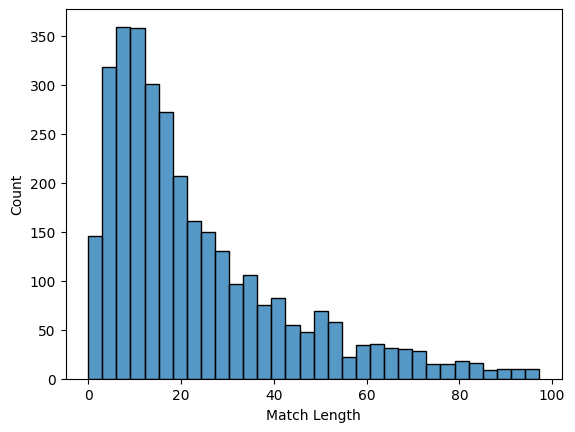

In [51]:
sns.histplot(novice_df["Match Length"])

### Distribution of Match Length at different program type

<Axes: xlabel='Program Type', ylabel='Match Length'>

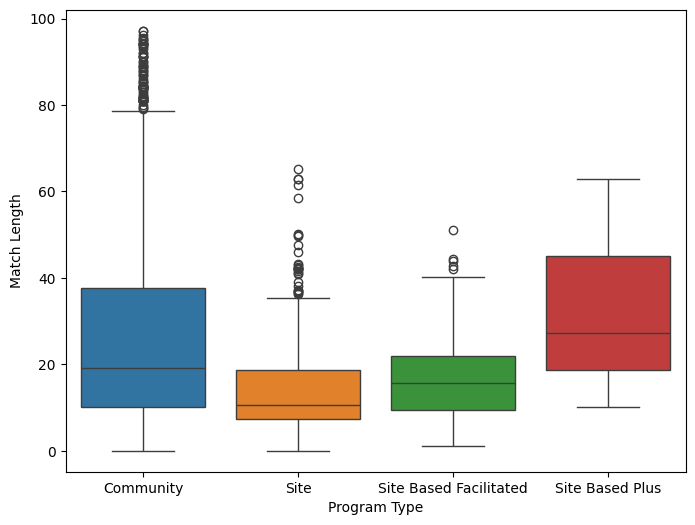

In [52]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = novice_df, x = "Program Type", y = "Match Length", hue = "Program Type")

### Distribution of Match Length over time (consider by Match Activation Date)

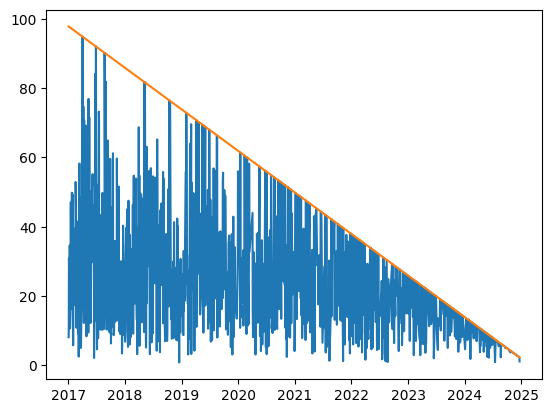

In [53]:
temp = novice_df.groupby("Match Activation Date")["Match Length"].mean().reset_index()
plt.plot(temp["Match Activation Date"], temp["Match Length"])
months_until_curr = (pd.to_datetime("2/27/2025") - temp["Match Activation Date"]).dt.days / (365.25 / 12)
plt.plot(temp["Match Activation Date"], months_until_curr)
# Matches that touches the orange line are those that still active until today

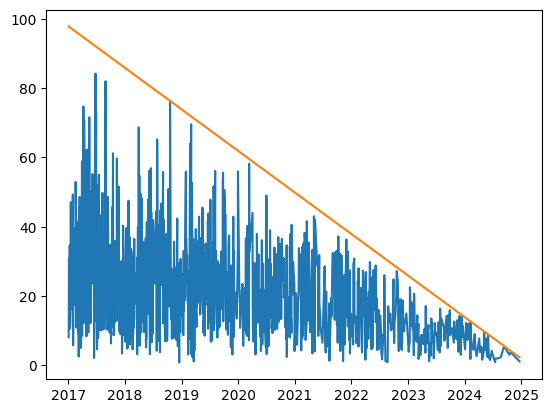

In [54]:
temp = novice_df[novice_df["Stage"] == "Closed"].groupby("Match Activation Date")["Match Length"].mean().reset_index()
plt.plot(temp["Match Activation Date"], temp["Match Length"])
months_until_curr = (pd.to_datetime("2/27/2025") - temp["Match Activation Date"]).dt.days / (365.25 / 12)
plt.plot(temp["Match Activation Date"], months_until_curr)

<Axes: xlabel='Month', ylabel='Match Length'>

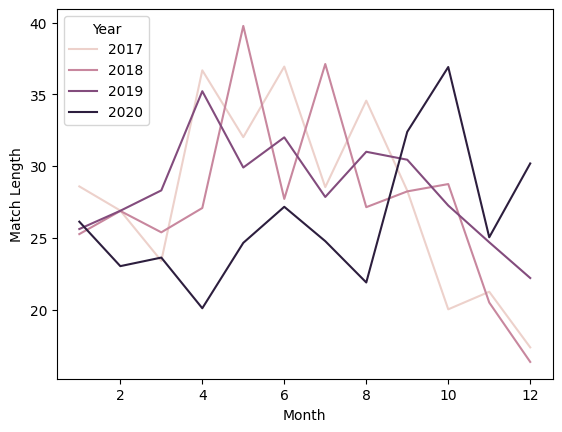

In [55]:
temp = deepcopy(novice_df[["Match Activation Date", "Match Length"]])
temp["Month"] = temp["Match Activation Date"].apply(lambda x: x.month)
temp["Year"] = temp["Match Activation Date"].apply(lambda x: x.year)
temp = temp.groupby(["Year", "Month"])["Match Length"].mean().reset_index()
sns.lineplot(data = temp[temp["Year"] <= 2020], x = "Month", y = "Match Length", hue = "Year")

<Axes: xlabel='Month', ylabel='Match Length'>

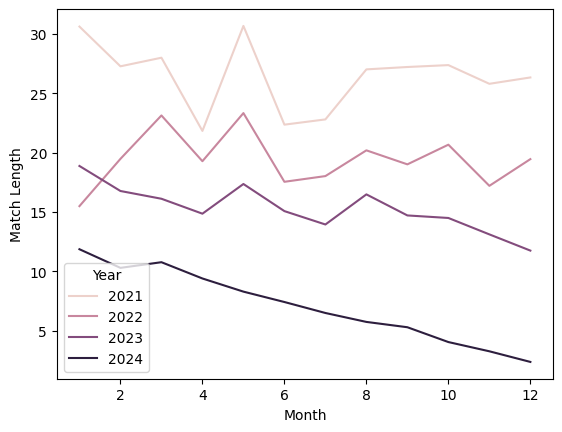

In [56]:
sns.lineplot(data = temp[temp["Year"] >= 2021], x = "Month", y = "Match Length", hue = "Year")

<Axes: xlabel='Quarter_Year', ylabel='Match Length'>

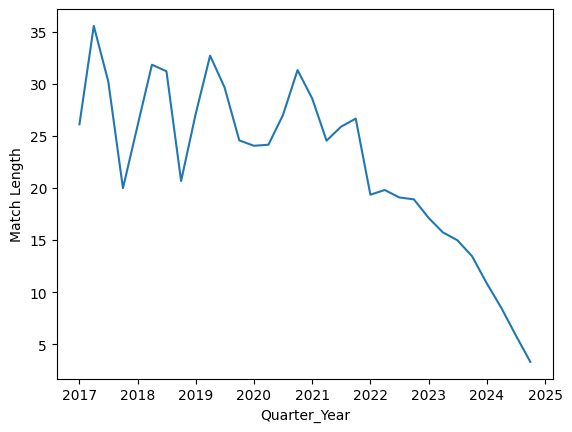

In [57]:
temp = deepcopy(novice_df[["Match Activation Date", "Match Length"]])
temp["Quarter"] = temp["Match Activation Date"].apply(lambda x: x.quarter)
temp["Year"] = temp["Match Activation Date"].apply(lambda x: x.year)
temp["Quarter_Year"] = pd.to_datetime(temp['Year'].astype(str) + 'Q' + temp['Quarter'].astype(str))
temp = temp.groupby(["Quarter_Year"])["Match Length"].mean().reset_index()
sns.lineplot(data = temp, x = "Quarter_Year", y = "Match Length")

### Match Length vs. Big Demographic data

In [58]:
novice_df.columns.to_list()

['Match ID 18Char',
 'Stage',
 'Little ID',
 'Big ID',
 'Big County',
 'Big Age',
 'Big Occupation',
 'Big: Military',
 'Big Approved Date',
 'Big Level of Education',
 'Big Languages',
 'Big Gender',
 'Big Birthdate',
 'Big Employer',
 'Program',
 'Program Type',
 'Big Race/Ethnicity',
 'Closure Reason',
 'Closure Details',
 'Match Activation Date',
 'Match Closure Meeting Date',
 'Rationale for Match',
 'Big Enrollment: Record Type',
 'Big Assessment Uploaded',
 'Big Acceptance Date',
 'Big Car Access',
 'Big Days Acceptance to Match',
 'Big Days Interview to Acceptance',
 'Big Days Interview to Match',
 'Big Open to Cross-Gender Match',
 'Big Re-Enroll',
 'Big Contact: Preferred Communication Type',
 'Big Contact: Former Big/Little',
 'Big Contact: Interest Finder - Sports',
 'Big Contact: Interest Finder - Places To Go',
 'Big Contact: Interest Finder - Hobbies',
 'Big Contact: Interest Finder - Entertainment',
 'Big Contact: Created Date',
 'Big Enrollment: Created Date',
 'Big Co

<Axes: xlabel='Big State', ylabel='Match Length'>

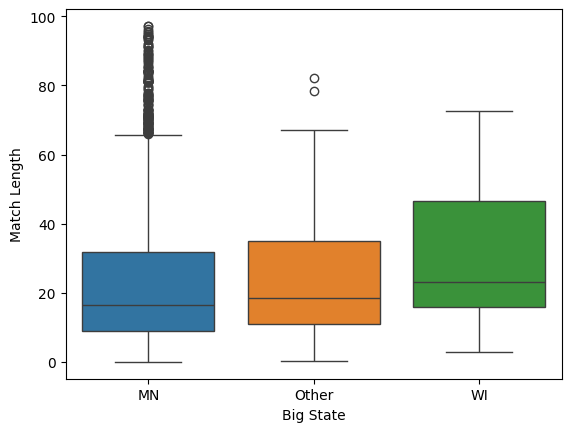

In [59]:
sns.boxplot(data = novice_df, x = "Big State", y = "Match Length", hue = "Big State")

<Axes: xlabel='Big Age', ylabel='Match Length'>

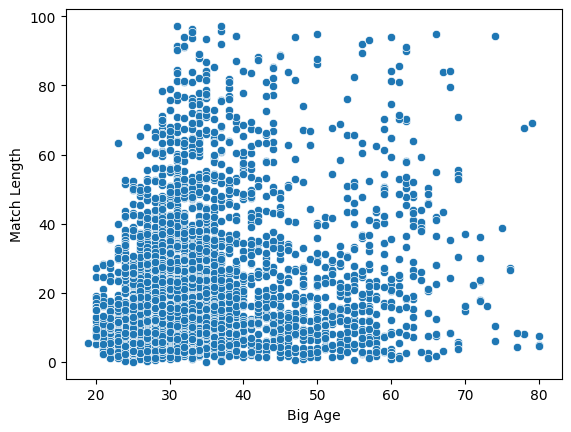

In [60]:
sns.scatterplot(data = novice_df, x = "Big Age", y = "Match Length")

<Axes: xlabel='Big: Military', ylabel='Match Length'>

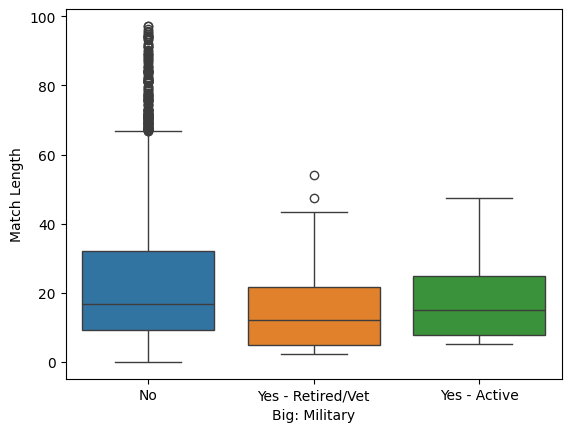

In [61]:
sns.boxplot(data = novice_df, x = "Big: Military", y = "Match Length", hue = "Big: Military")

<Axes: xlabel='Match Length', ylabel='Big Level of Education'>

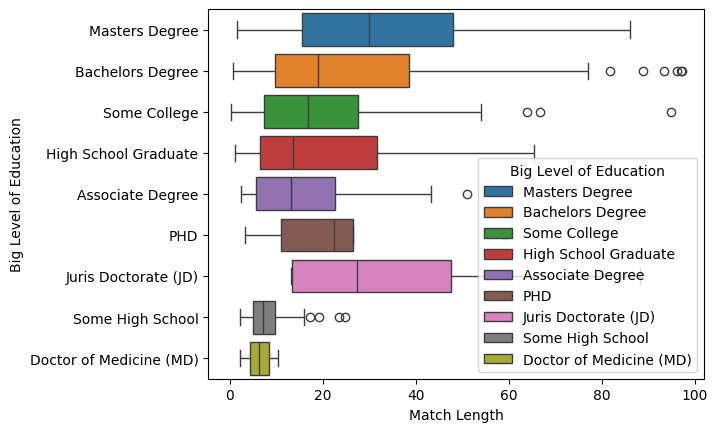

In [62]:
sns.boxplot(data = novice_df, y = "Big Level of Education", x = "Match Length", hue = "Big Level of Education")

<Axes: xlabel='Match Length', ylabel='Big Gender'>

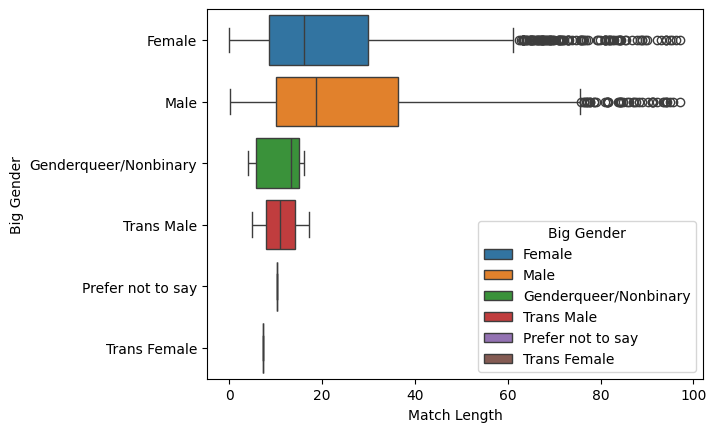

In [63]:
sns.boxplot(data = novice_df, y = "Big Gender", x = "Match Length", hue = "Big Gender")

<Axes: xlabel='Big Car Access', ylabel='Match Length'>

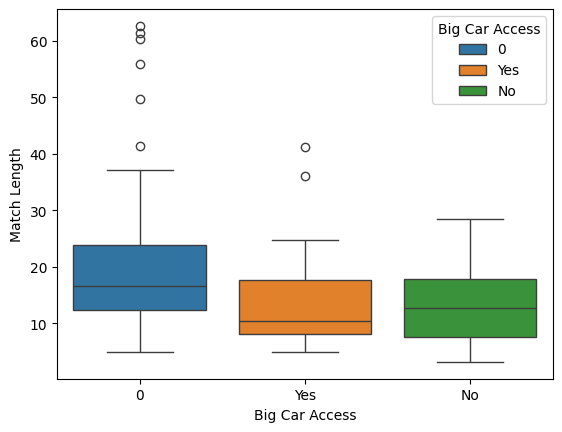

In [64]:
sns.boxplot(data = novice_df, x = "Big Car Access", y = "Match Length", hue = "Big Car Access")

<Axes: xlabel='Big Re-Enroll', ylabel='Match Length'>

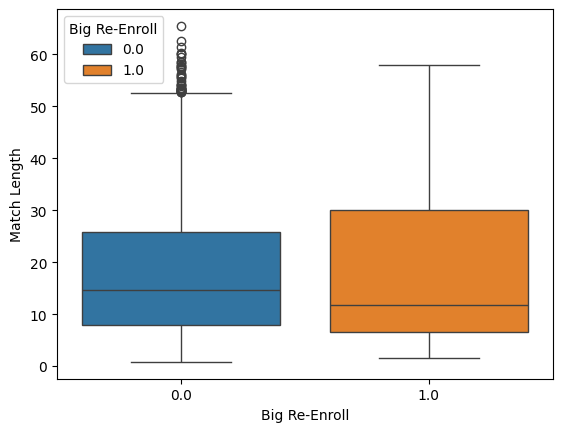

In [65]:
sns.boxplot(data = novice_df, x = "Big Re-Enroll", y = "Match Length", hue = "Big Re-Enroll")

<Axes: xlabel='Same County', ylabel='Match Length'>

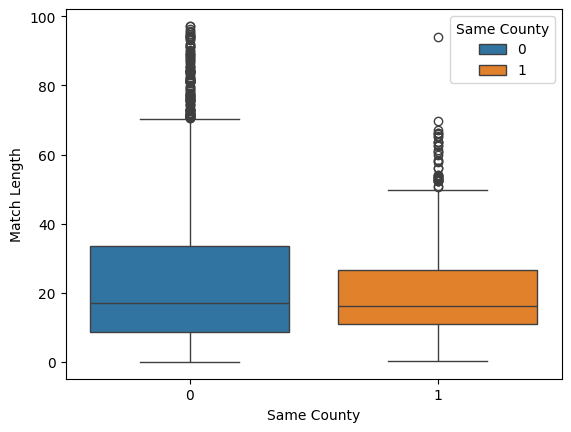

In [66]:
sns.boxplot(data = novice_df, x = "Same County", y = "Match Length", hue = "Same County")

<Axes: xlabel='Same Zip', ylabel='Match Length'>

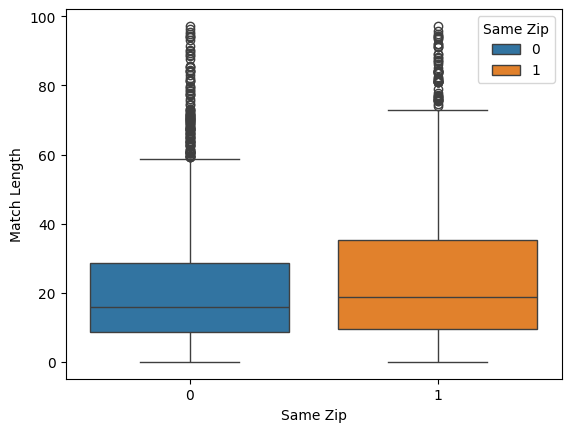

In [67]:
sns.boxplot(data = novice_df, x = "Same Zip", y = "Match Length", hue = "Same Zip")

<Axes: xlabel='Same State', ylabel='Match Length'>

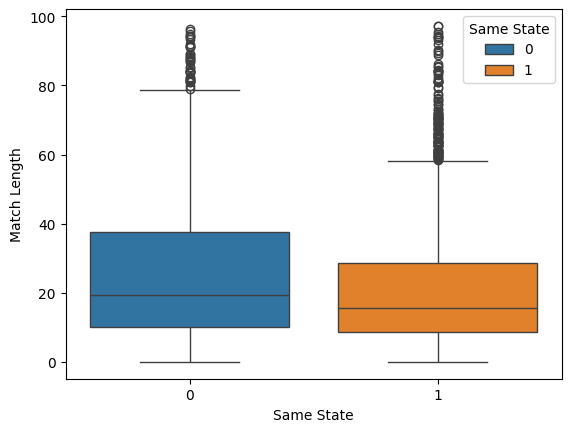

In [68]:
sns.boxplot(data = novice_df, x = "Same State", y = "Match Length", hue = "Same State")

<Axes: xlabel='Has Rationale for Match', ylabel='Match Length'>

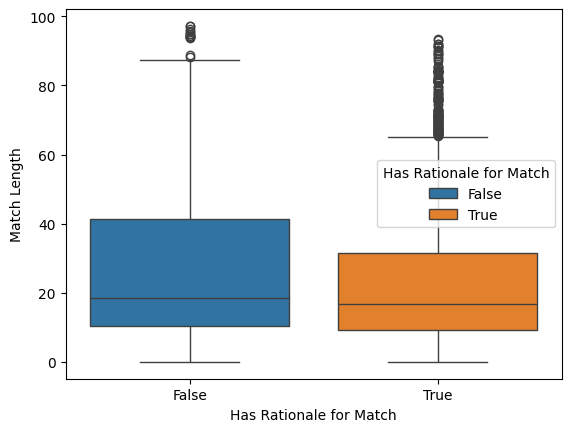

In [69]:
sns.boxplot(data = novice_df, x = "Has Rationale for Match", y = "Match Length", hue = "Has Rationale for Match")